#  Metropolis Sampling

In [1]:
import numpy as np
from PlotFunctions import read, PlotCombined

## Setting the scene

Our aim will be computing the mean value for the radius $r$ over two hydrogen atom eigenstates:\
The ground state
$$
\psi_{gs}(r,\theta,\phi)=
\frac{1}{\sqrt{\pi}} e^{-r/a_0} 
$$
And one of the three $n=2$ excited state 
$$
\psi_{es}(r,\theta,\phi)=
\sqrt{\frac{1}{32\pi}} r e^{-r/2a_0} \cos(\theta)
$$
where the choice of units Bohr's radius $a_0 = 1$ is made.

The expectation values for the radius are:
$$
\left\langle r \right\rangle_{\psi_{gs}} = 1.5
\quad
\left\langle r \right\rangle_{\psi_{es}} = 5
$$

We will make use of the Metropolis algorithm. The idea, at the most primal level, is to create a Markov chain in which the walker is incentivized to direct itself in zones where the pdf has higher values, and dwell in that zone.
One achieves this with the algorithm

1 - evaluate the pdf in the current position\
2 - draw a sample from a transition probability, and evaluate the pdf at that point\
3 - compare the two values: if the new value is higher than the old one, the move is accepted\
4 - if the new value is lower, the move is accepted with a probability equal to the ratio between the pdf in the
    new point and in the current point

All the simulations ar run with 100 blocks composed of 10.000 steps. A detailed study of autocorrelation is not performed here, but being that the algorithm doesn't take much power to run, a safe estimate is made and the number of steps per block is chosen in that order of magnitude.

Equilibration is achieved, on an empirical basis, by running the simulation for half a block

The starting point is chosen to be (0, 0, 0) in all cases

The parameters give an acceptance between 0.47 and 0.61 in all cases

## Uniform transition probability

Here we use a uniform transition probability $T(\vec{x}|\vec{y})$. The conditional probabilityn notation means that each point $\vec{y}$ is extracted under the assumption that the walker is currently in position $\vec{x}$, so a point is going to be extracted in a cube centered in $\vec{x}$ with sides 2 $\times$ StepWidth

Step width (ground state): 0.9
\
Step width (excited state): 2.9

### Ground State - Uniform step

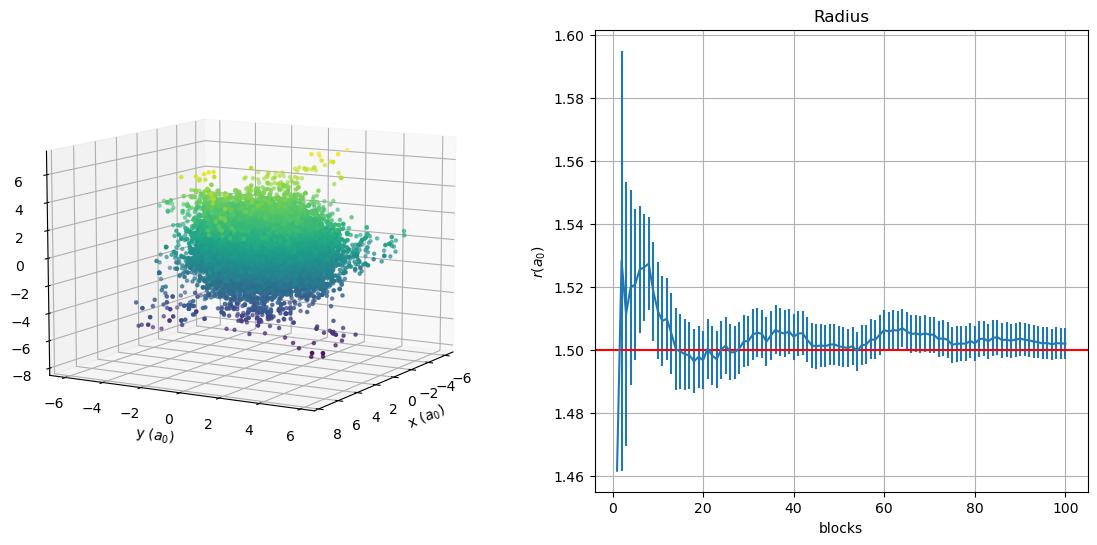

Result =  1.50207
Error =  0.00488027


In [2]:
PlotCombined('GroundState', 'Uniform')

### Excited State - Uniform step

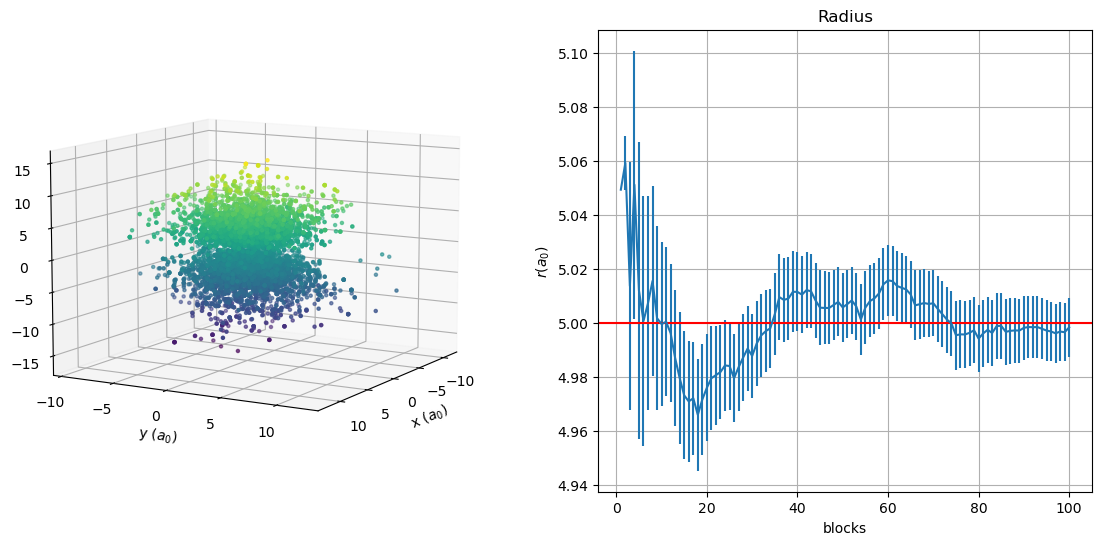

Result =  4.99837
Error =  0.0108083


In [3]:
PlotCombined('ExcitedState', 'Uniform')

## Gaussian transition probability

We now employ a multivariate gaussian as $T(\vec{x}|\vec{y})$. The $\sigma$ of the distribution, unlike its mean, is fixed and depends on what distribution is being sampled

Step width (i.e. $\sigma$) (ground state): 0.8
\
Step width (i.e. $\sigma$) (excited state): 1.9

### Ground State - Gaussian step

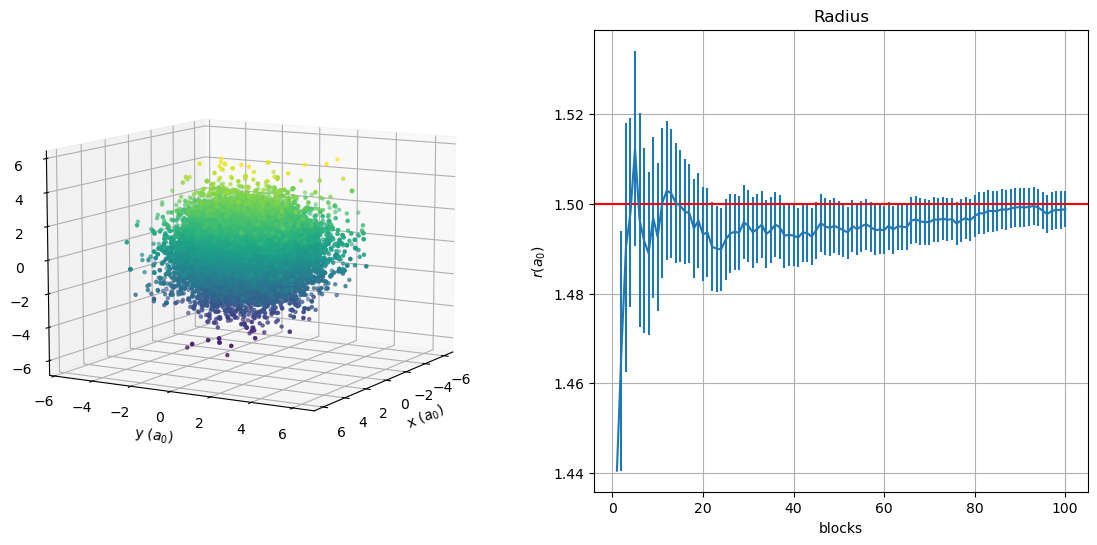

Result =  1.49885
Error =  0.00410057


In [4]:
PlotCombined('GroundState', 'Gaussian')

### Excited State - Gaussian step

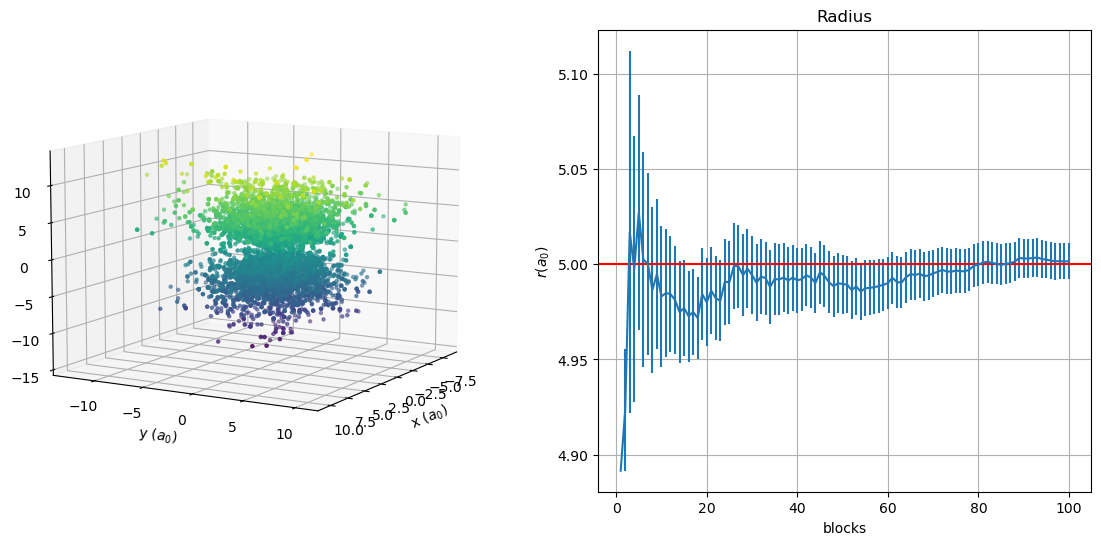

Result =  5.00148
Error =  0.00938409


In [5]:
PlotCombined('ExcitedState', 'Gaussian')

## Conclusions

It would appear like sampling using a gaussian transition probability makes the result converge faster and with less oscillations. We can see this in the fact that the distribution is being more effectively reproduced in the gaussian case, since the pictures for the sampled points appear to be more centered around the expected positions. This is probably due to the nature of the pdf's: a uniform step is perhaps more useful in a situation in which the pdf presents a number of sharp local minima and maxima, since it allows to explore the configuration space more evenly and "abruptly". In a situation like this, where the structure of the distribution is more gentle, a gaussian allows us to "stay local" while still being able to move around and not have a 100% acceptance rate, which would imply high auto-correlation between the points